```
This file is part of connectome-manipulator.

SPDX-License-Identifier: Apache-2.0
Copyright (c) 2024 Blue Brain Project/EPFL
```

# Null manipulation example

Minimal working example to test the connectome manipulation pipeline without performing any actual manipulation, i.e., output connectome will be identical to input connectome.

## Connectome Manipulation

Setup and run connectome manipulation.

### Step 1: Download example circuit

Download and uncompress the SONATA toy circuit from ZENODO (DOI [10.5281/zenodo.12202780](https://doi.org/10.5281/zenodo.12202780)), or use any other network model in SONATA format.

### Step 2: Set circuit path in manipulation config

Under "circuit_config" in `manip_config__null_manipulation.json`, set the path pointing to the circuit config of the SONATA network model.

### Step 3: Run manipulation

Run connectome manipulation using one of the following launch commands.

__Launch command - Serial processing:__

~~~
connectome-manipulator -v manipulate-connectome "manip_config__null_manipulation.json" --output-dir="/gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/circuits/ToyCircuit_NullManip" --parallel --profile --convert-to-sonata --splits=500
~~~

❗ Set `output-dir=...` accordingly (must be an absolute path)<br>
❗ `--convert-to-sonata` requires `parquet-converters`

__Launch command - Parallel processing on MPI cluster using SLURM:__

~~~
sbatch run_rewiring_parallel.sh "manip_config__null_manipulation.json" "/gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/circuits/ToyCircuit_NullManip" 500
~~~

❗ Adjust `run_rewiring_parallel.sh` according to SLURM configuration<br>
❗ Set output directory accordingly (must be an absolute path)<br>
❗ Requires `parquet-converters` and `mpi4py`


__Output (example):__

~~~
Autoloading python/3.10.8
Autoloading hpe-mpi/2.25.hmpt
Autoloading python/3.10.8
Autoloading hpe-mpi/2.25.hmpt
Dashboard URL: r1i5n20.bbp.epfl.ch:8787
[INFO] Log file "/gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/circuits/ToyCircuit_NullManip/logs/connectome_manipulation_2024-06-24_10h15.log" created!
[INFO] Version: connectome_manipulator 0.0.11.dev1
[INFO] Loading circuit from /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/Zenodo/ToyCircuit-S1-6k/circuit_config.json
[INFO] Setting up 500 processing batch jobs...
[INFO] Starting Execution context
[INFO] Start job submission
[INFO] Split 1/500: Wiring connectome targeting 12 neurons
[INFO] Split 2/500: Wiring connectome targeting 12 neurons
...
[INFO] [100%] Finished 500 (out of 500) splits
[INFO] DASK jobs finished
[INFO] Shutting down DASK workers gracefully
[INFO] Done processing
[INFO]   Total input/output synapse counts: 568717/568717 (Diff: 0)
[INFO] Converting 494 (non-empty) .parquet file(s) to SONATA
[INFO] Deleting 494 temporary .parquet file(s), "_metadata" file, and "parquet.DONE"
[INFO] Creating SONATA config /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/circuits/ToyCircuit_NullManip/circuit_config.json
[INFO] +=============================================== PROFILER STATS ===============================================+
[INFO] |                Event Label                 | Min.Time | Avg.Time | Max.Time | Min.Mem  | Avg.Mem  | Max.Mem  |
[INFO] +--------------------------------------------------------------------------------------------------------------+
[INFO] | connectome_manipulation_main               |     7.77 |     7.77 |     7.77 |     0.01 |     0.01 |     0.01 |
[INFO] | processing                                 |     0.01 |     0.03 |     0.07 |     0.00 |     0.00 |     0.00 |
[INFO] |   write_to_parquet                         |     0.00 |     0.01 |     0.05 |     0.00 |     0.00 |     0.00 |
[INFO] +--------------------------------------------------------------------------------------------------------------+
~~~

## Structural comparison

After connectome manipulation, setup and run structural comparison. Both connectomes are supposed to be identical!

### Step 1: Set circuits and paths in structural comparator config

Set the following paths in `structcomp_config__null_manipulation.json`:
- Under "circuit_config", set paths to original and manipulated circuit configs.
- Under "working_dir" and "out_dir", set working directory (for cached data) and output directory. Both can be set the same directory.

### Step 2: Configure comparison plots

Under "plot_types" in `structcomp_config__null_manipulation.json`, the list of comparison plots can be modified. In this example, the following plots are pre-configured:

- "Adjacency": Adjacency matrix between all neurons ("All").
- "ConnPerLayer_EE": Connection probability and number of synapses per connection between excitatory neurons for all pairs of layers.
- "PropsPerLayer_EE": Mean value of selected pyhsiological synapse properties (e.g., conductance, delay, ...) between excitatory neurons for all pairs of layers.

### Step 3: Run structural comparison

__Launch command:__

~~~
connectome-manipulator -v compare-connectomes "structcomp_config__null_manipulation.json"
~~~

__Output (example):__

~~~
VERSION INFO: connectome_manipulator 0.0.11.dev1
INFO: 2 circuits loaded:
  /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/Zenodo/ToyCircuit-S1-6k/circuit_config.json
  /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/circuits/ToyCircuit_NullManip/circuit_config.json
INFO: Preparing "Adjacency" plot(s)...
INFO: Creating 5924x5924 adjacency matrix (sel_src={'node_set': 'All'}, sel_dest={'node_set': 'All'})
INFO: Writing resutls to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/structural_comparator/data/Original_Adjacency.pickle
INFO: Creating 5924x5924 adjacency matrix (sel_src={'node_set': 'All'}, sel_dest={'node_set': 'All'})
INFO: Writing resutls to /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/structural_comparator/data/NullManip_Adjacency.pickle
INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/structural_comparator/Original_vs_NullManip/struct_comp-Adjacency-adj.png...
INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/git/connectome-manipulator/examples/structural_comparator/Original_vs_NullManip/struct_comp-Adjacency-adj_cnt.png...
...
~~~

__Re-plot exemplary results within notebook__

All differences are indeed zero, i.e., the connectomes are identical!

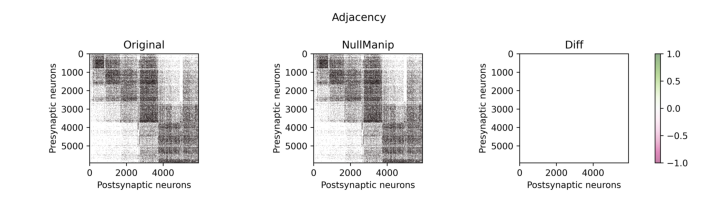

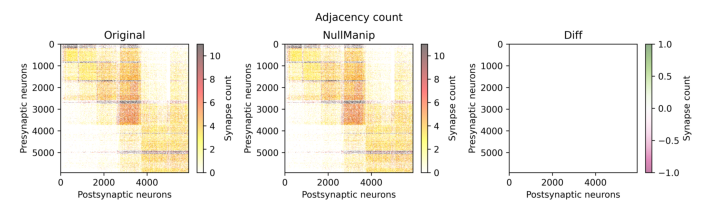

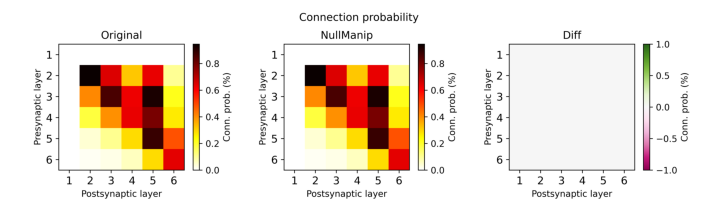

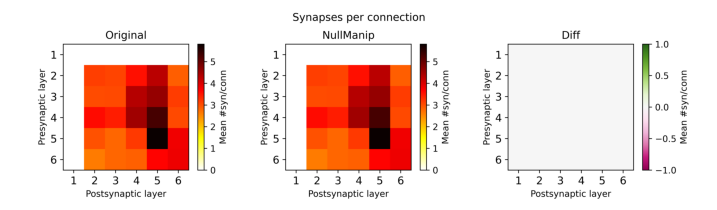

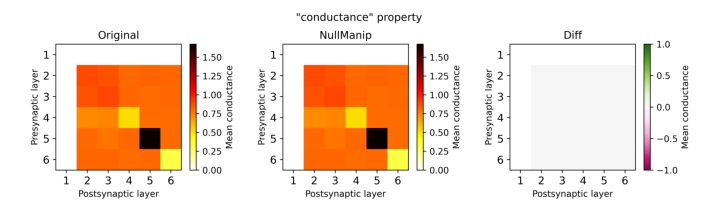

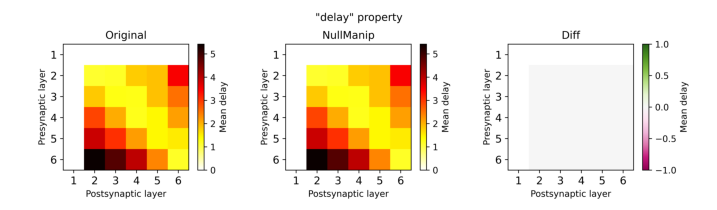

In [2]:
import matplotlib.pyplot as plt
res_path = "../structural_comparator/Original_vs_NullManip"
for fn in [f"{res_path}/struct_comp-Adjacency-adj.png",
           f"{res_path}/struct_comp-Adjacency-adj_cnt.png",
           f"{res_path}/struct_comp-ConnPerLayer_EE-conn_prob.png",
           f"{res_path}/struct_comp-ConnPerLayer_EE-nsyn_conn.png",
           f"{res_path}/struct_comp-PropsPerLayer_EE-conductance.png",
           f"{res_path}/struct_comp-PropsPerLayer_EE-delay.png"]:
    img = plt.imread(fn)
    plt.figure(figsize=(9, 3))
    plt.imshow(img)
    plt.axis("off")
    plt.show()